# EARLY DIABETES DETECTION

## MAIN OBJECTIVE
Build a classification model that predicts early onset of diabetes using health indicators

## SPECIFIC OBJECTIVES
- How accurately can our model predict diabetes in a patient?
- What is the model's general ability to differentiate between diabetic and non-diabetic patients?
- What are the specific strengths and weaknesses of the model's predictions for each patient group?

## BUSINESS UNDERSTANDING
This project focuses on building a classification model to identify patients at risk of developing diabetes using health data such as glucose levels, BMI, and age.
The main stakeholders in this project are primary healthcare doctors and health insurers, who both benefit from the early detection of diabetes. 
Doctors can use the predictions to guide earlier interventions and to avoid missing cases, while insurers are interested in reducing healthcare costs through prevention.


## IMPORT LIBRARIES


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, auc, roc_curve, f1_score, recall_score, precision_score
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore")


In [3]:
#Load dataset
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pd.set_option('display.max_rows', None)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## EXPLORATORY DATA ANALYSIS

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
#checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

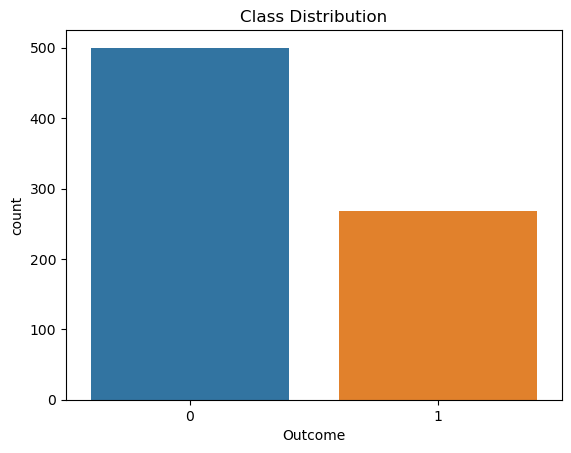

In [8]:
#checking class distribution
sns.countplot( data=df, x='Outcome')
plt.title('Class Distribution')
plt.show()

#### Interpretation
The plot  above shows an imbalance in class distribution. Class 0 is significantly more frequent than class 1. This will be addressed by (class_weight= 'balanced') during model training to prevent the model from being biased towards the majority class.

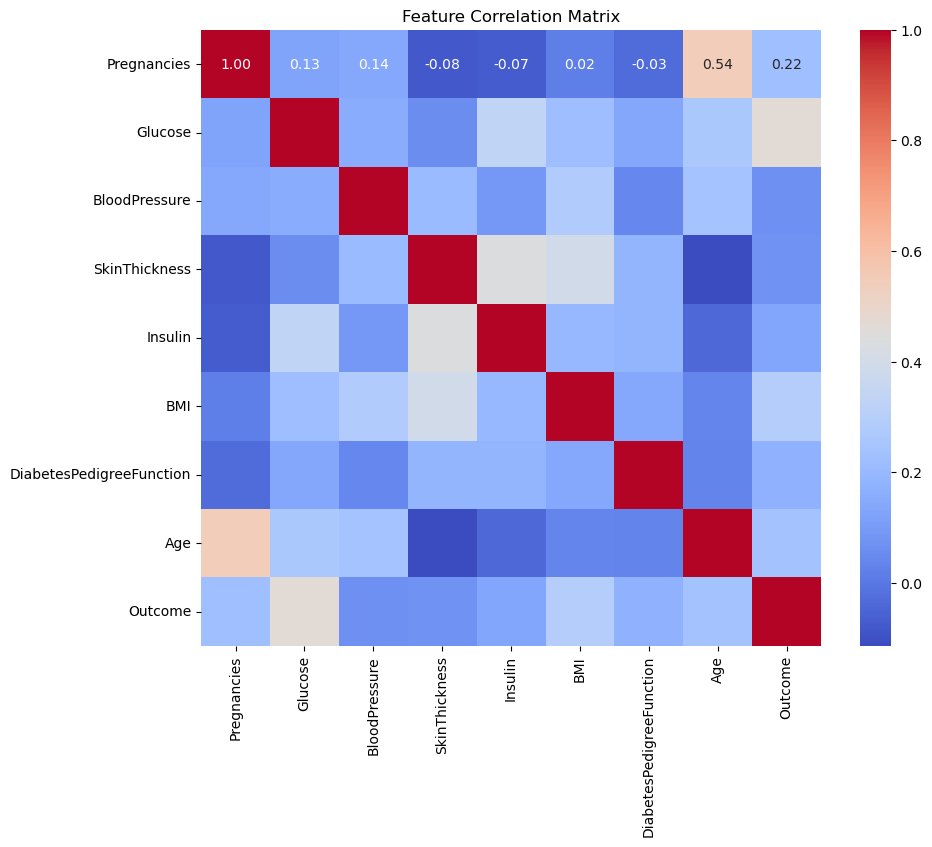

In [9]:
# Checking for correlation of Features using a correlation matrix to help understand the relationship in the data
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()



#### correlation interpretation
None of the features are strongly correlated with each other ( r > 0.8); therefore, none will be dropped based on correlation. 

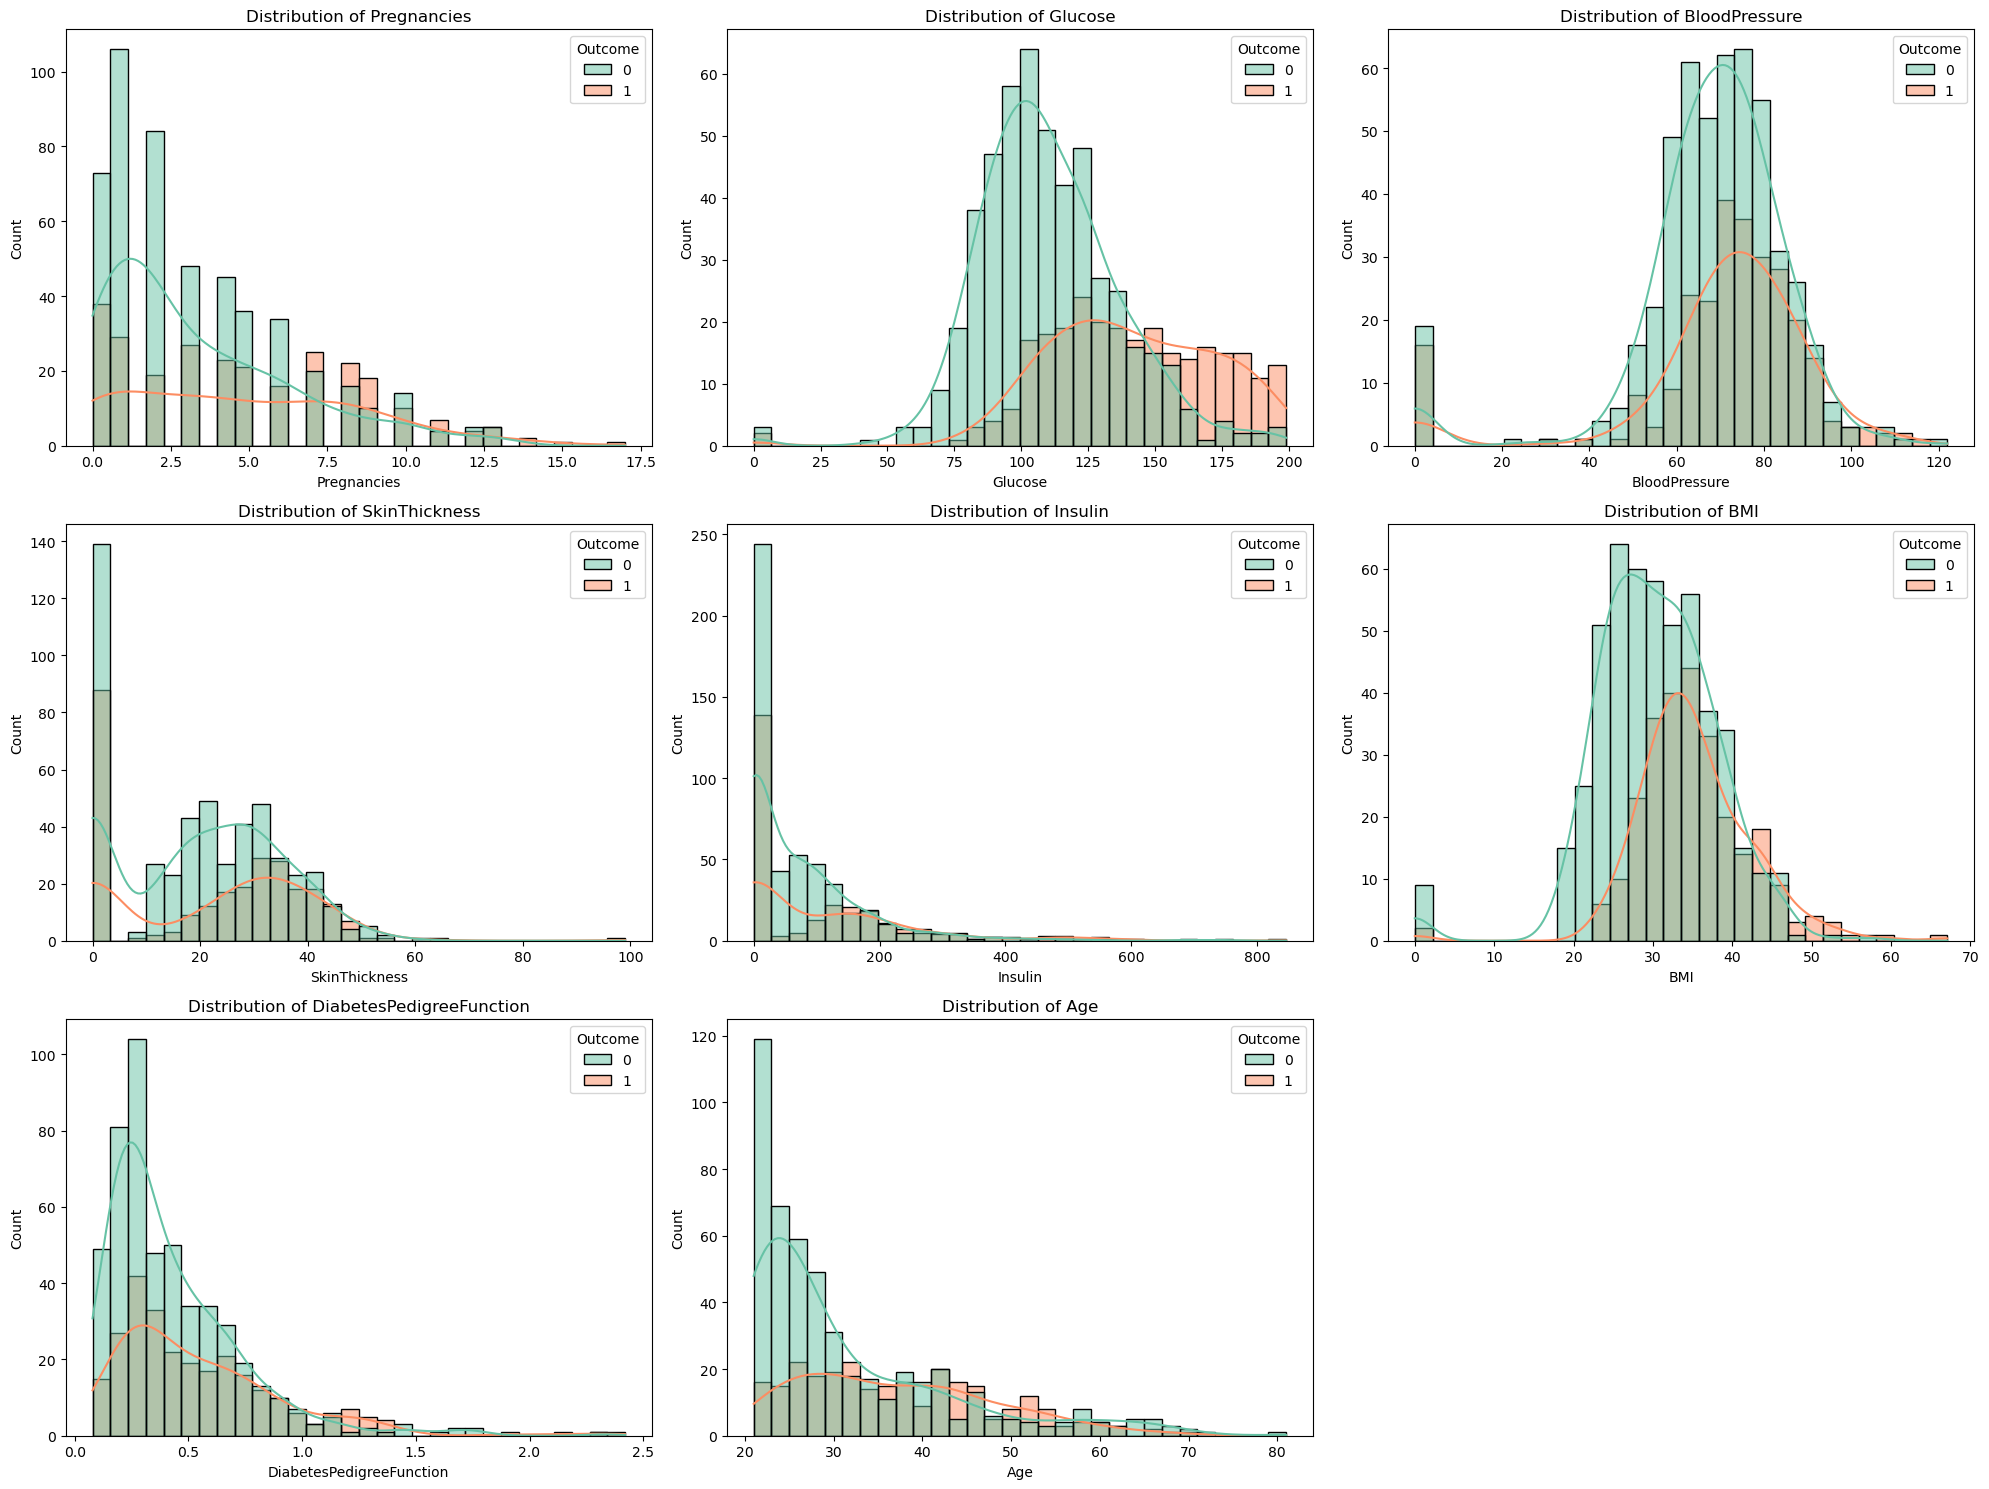

In [10]:
 #feature Distributions by Class (Diabetic vs. Non-Diabetic)
features = df.columns[:-1]  # Exclude 'Outcome'

plt.figure(figsize=(20, 15))
for i, col in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, bins=30, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### Feature Distribution Insights

Visualizing the distribution of features grouped by diabet outcome (either 0 or 1  ) helps us understand the role of each feature:

- **Glucose**: Strong visual separation; diabetic patients have higher glucose levels.
- **BMI**: Diabetic patients tend to have higher BMI — an important risk factor.
- **Age**: Slight skew toward older individuals in the diabetic group.
- **Pregnancies**: More pregnancies correlate loosely with diabetes.
- **Insulin, SkinThickness, DiabetesPedigreeFunction**: Heavily righ. will be it from log tedormation.
- **BloodPressure**: Fairly similar between groups, but extreme values may be infrpretation.


## DATA PREPARATION

In [11]:
#Some columns cannot have 0 values since it's impossible. We replace them with Nan
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace(0, np.nan)

In [12]:
#check for missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
# Fill the Nan values with median 
df[cols] = df[cols].fillna(df[cols].median())

In [14]:
#check if there are still missing values present
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# log-transformation of skewed features
log_transformer = FunctionTransformer(np.log1p, validate=True)
skewed_features = ['Insulin', 'DiabetesPedigreeFunction', 'SkinThickness', 'Pregnancies']
df[skewed_features] = log_transformer.fit_transform(df[skewed_features])


In [21]:
#Train- Test split. stratify because of the imbalance
x = df.drop('Outcome', axis=1)
y= df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
#Feature scaling. Fit on the train set to avoid data leakage
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## MODELING

### Logistic regression

In [25]:
# 3. Train the model and make predictions on the test data
model = LogisticRegression(C=1.0, class_weight='balanced', random_state=42)
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled) #predicts 0 or 1 
y_proba = model.predict_proba(x_test_scaled)[:, 1] # Get probabilities of being '1' (diab

In [37]:
print('Classification report:')
print(classification_report(y_test, y_pred))
print('Confusion matrix:')
print()
print(confusion_matrix(y_test, y_pred))

Classification report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       100
           1       0.61      0.72      0.66        54

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154

Confusion matrix:

[[75 25]
 [15 39]]


#### Tuning Logistic Regression (Finding the Best Settings)

In [40]:
log_reg_model = LogisticRegression(class_weight='balanced', random_state=42, solver='liblinear')

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'] # L1 (Lasso) and L2 (Ridge) regularization
}

# GridSearchCV 
grid_lr = GridSearchCV(estimator=log_reg_model,
                       param_grid=param_grid_lr,
                       cv=5,
                       scoring='accuracy', 
                       n_jobs=-1,        # Use all available CPU cores
                       verbose=1)

# Fit GridSearchCV to your scaled training data
grid_lr.fit(x_train_scaled, y_train)

# Get Best Model and Evaluate 
print("Best Logistic Regression parameters:", grid_lr.best_params_)
print(f"Best cross-validation accuracy score (Logistic Regression): {grid_lr.best_score_:.2f}")
print()
best_lr_model = grid_lr.best_estimator_

# Make predictions on the scaled test set
y_pred_lr = best_lr_model.predict(x_test_scaled)
y_proba_lr = best_lr_model.predict_proba(x_test_scaled)[:, 1]

# Evaluate the best model on the test set using accuracy
test_accuracy_lr = best_lr_model.score(x_test_scaled, y_test)
print(f"Test set accuracy with best LR model: {test_accuracy_lr:.2f}")



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Logistic Regression parameters: {'C': 1, 'penalty': 'l1'}
Best cross-validation accuracy score (Logistic Regression): 0.76

Test set accuracy with best LR model: 0.75


### Decision Trees

In [33]:
dt = DecisionTreeClassifier(random_state=42, class_weight="balanced")
dt.fit(x_train, y_train)
#Make predictions on the test set
y_pred_dt = dt.predict(x_test_scaled)
y_proba_dt = dt.predict_proba(x_test_scaled)[:, 1] # Get probabilities of being '1' (diabetic)

In [36]:
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Classification report:')
print(classification_report(y_test, y_pred_dt))
print('Confusion matrix:')
print()
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.5974025974025974
Classification report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.69       100
           1       0.43      0.44      0.44        54

    accuracy                           0.60       154
   macro avg       0.56      0.56      0.56       154
weighted avg       0.60      0.60      0.60       154

Confusion matrix:

[[68 32]
 [30 24]]


#### Tuning Decision Tree
Use GridSearchCV to find the best settings for our Decision Tree, like its maximum depth (how many questions it can ask) and how many samples must be in a leaf (the final decision point).

In [55]:
#Define the hyperparameter grid
param_grid_dt = {
    'max_depth': [3, 5, 7, 10 ],         # How deep the tree can go
    'min_samples_leaf': [10, 20, 20, 30, 40, 50],  # Minimum samples required at each leaf (end node)
    'min_samples_split':[2, 5, 10],
    'criterion': ['gini', 'entropy']      # How the tree decides where to split
}

# Use GridSearchCV to test all combinations and find the best one 
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight="balanced"), param_grid_dt, cv=5, scoring='accuracy') 
                       

# Train models with all combinations
grid_dt.fit(x_train_scaled, y_train)

# Show the best settings and corresponding recall score
print("Best Decision Tree parameters:", grid_dt.best_params_)
print(f"Best cross-validation accuracy score: {grid_dt.best_score_:.2f}") # Formatted to 2 decimal places

# Evaluate on the test set using the best model
best_dt = grid_dt.best_estimator_
test_accuracy = best_dt.score(x_test_scaled, y_test)
print(f"Test set accuracy with best model: {test_accuracy:.2f}")

# Make predictions on the test set using the best model
y_pred_best_dt = best_dt.predict(x_test_scaled)
y_proba_best_dt = best_dt.predict_proba(x_test_scaled)[:, 1]



Best Decision Tree parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 2}
Best cross-validation accuracy score: 0.76
Test set accuracy with best model: 0.75


## EVALUATION

### Logistic regression

In [79]:
# Classification Report
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_lr))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.84      0.75      0.79       100
           1       0.62      0.74      0.67        54

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154



Confusion Matrix:
[[75 25]
 [14 40]]


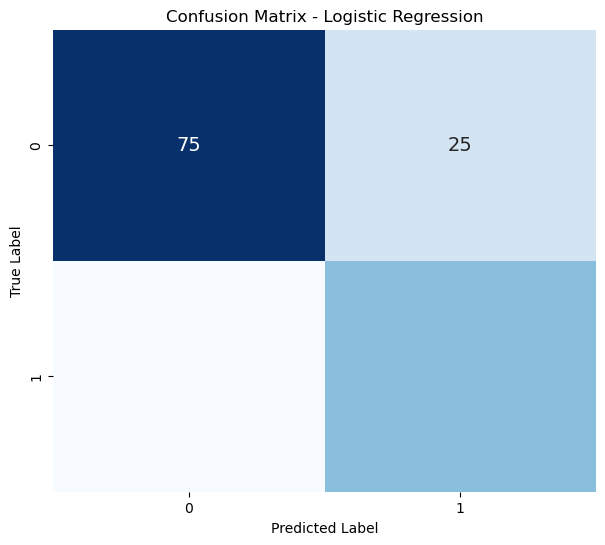

In [80]:
#  Confusion Matrix
print("Confusion Matrix:")
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

# Visualize Confusion Matrix
plt.figure(figsize=(7, 6)) 
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_lr_model.classes_, yticklabels=best_lr_model.classes_,
            annot_kws={"size": 14}) # Ensure numbers are readable
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()




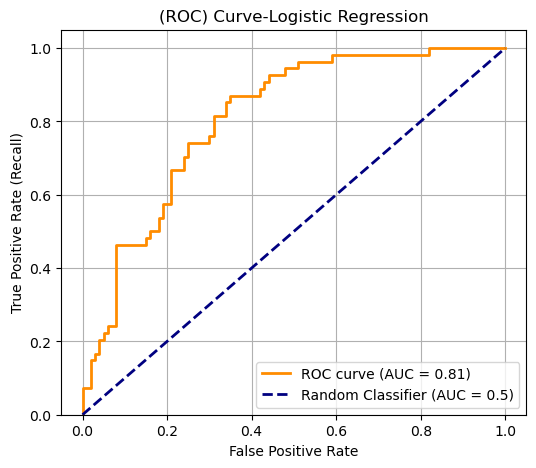

In [81]:
#ROC-AUC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
#Claculate area under curve
roc_auc = auc(fpr, tpr)
#Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)') 
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('(ROC) Curve-Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



                    Feature  Coefficient
1                   Glucose     1.103685
5                       BMI     0.671304
7                       Age     0.363348
6  DiabetesPedigreeFunction     0.299731
0               Pregnancies     0.150403
4                   Insulin     0.109760
3             SkinThickness     0.020643
2             BloodPressure    -0.001505


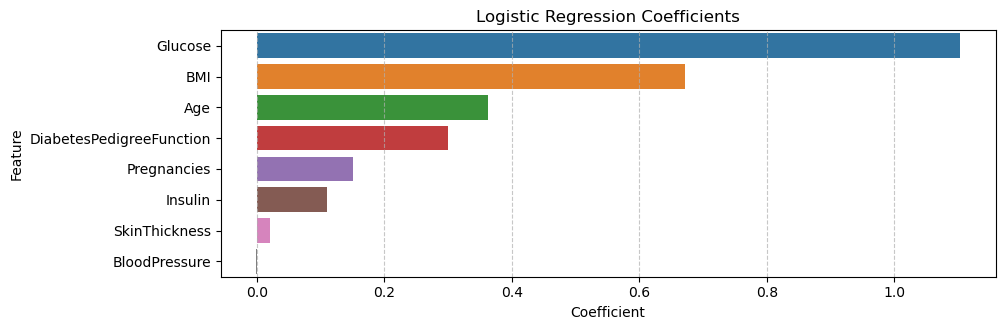

In [82]:
# Feature importances in logistic regression
coefs = best_lr_model.coef_[0]
coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': coefs}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

plt.figure(figsize=(10, len(coefs) * 0.4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Logistic Regression Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


### Decision Trees

In [83]:
# Classification Report 
print("Classification Report:")
print(classification_report(y_test, y_pred_best_dt))

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.60      0.85      0.70        54

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.74       154
weighted avg       0.79      0.75      0.75       154



Confusion Matrix:
[[69 31]
 [ 8 46]]


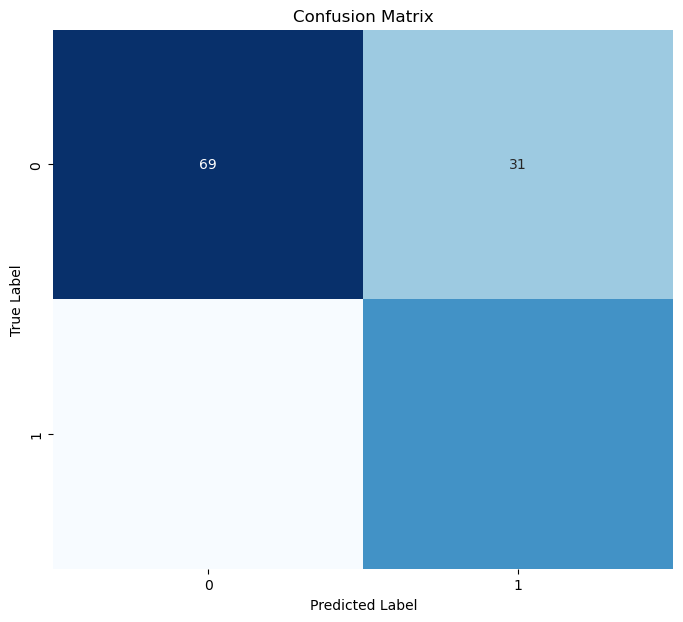

In [84]:
# Confusion Matrix

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best_dt)
print(cm)

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=best_dt.classes_, yticklabels=best_dt.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


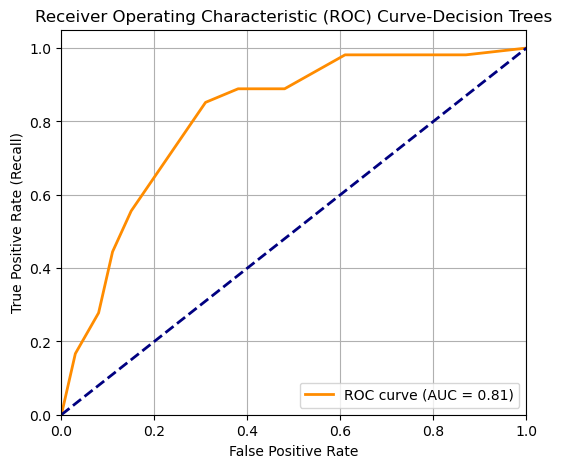

In [85]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba_best_dt)
# Calculate area under curve
roc_auc = auc(fpr, tpr)
#Plor ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve-Decision Trees')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

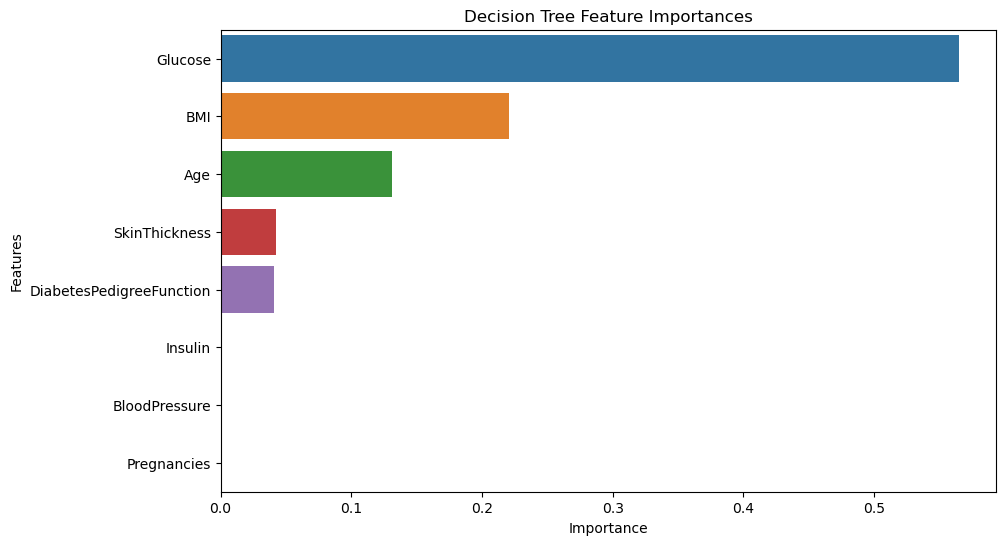

In [86]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Decision Tree Feature Importances")
sns.barplot(x=importances[indices], y=np.array(x.columns)[indices])
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

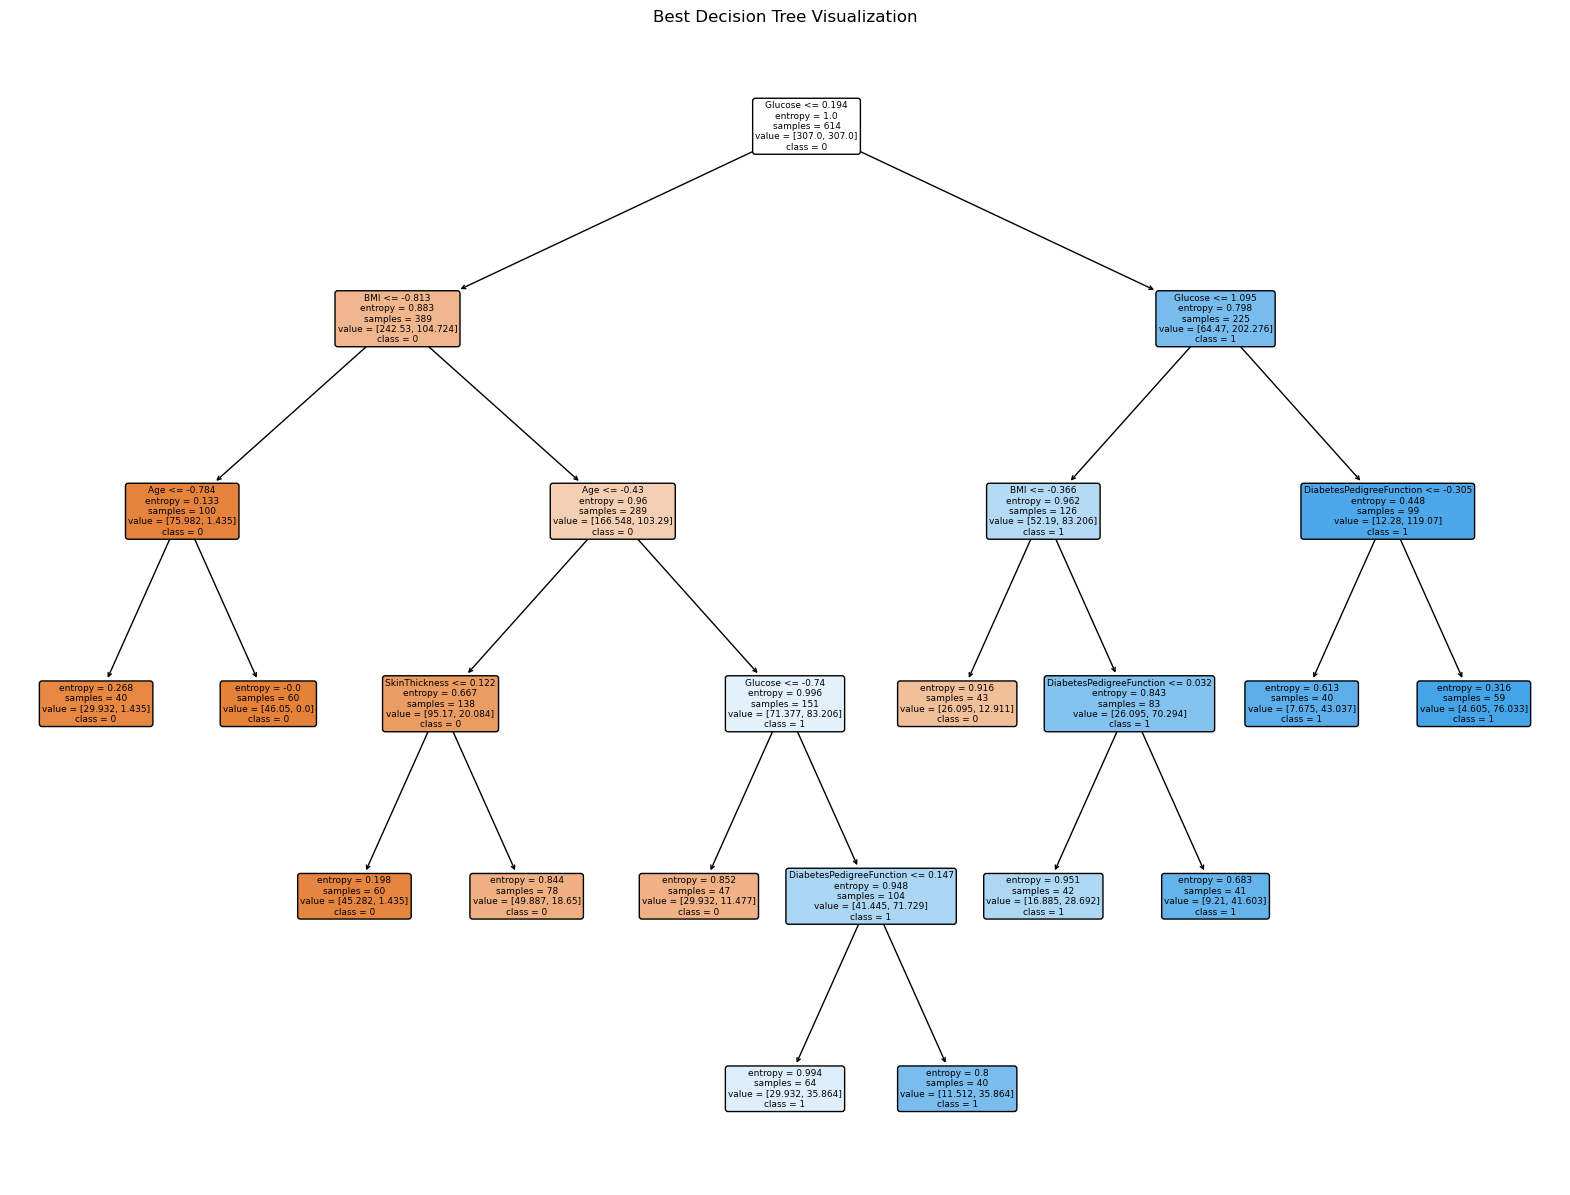

In [101]:

plt.figure(figsize=(20, 15))
plot_tree(best_dt, filled=True, rounded=True, feature_names=x.columns.tolist(), class_names=[str(c) for c in best_dt.classes_])
plt.title('Best Decision Tree Visualization')
plt.show()


## RESULTS

### Logistic Regression

- **Accuracy(0.75)**: The model was correct 75% of the time
- **Recall for class 1**: This is crucial for the early detection of diabetes. The model correctly identifies 74% of actual diabetic cases. This means it is good at catching those who truly have the condition
- **Precision of class 1**: When the model predicts someone has diabetes, it's correct 62% of the time. This means about 38% of those flagged as diabetic might actually be healthy(False positive)
- **AUC**: The model has a strong ability to differentiate between diabetic and non-diabetic individuals, indicated by an AUC of 0.81
- **Most Influential Factors**:
Glucose is by far the most important predictor.
BMI and Age also play significant roles in the model's predictions.

In conclusion, the model is effective at catching most diabetes cases, but there's room to reduce false alarms and missed cases to make it even more reliable for clinical use. The factors like glucose, BMI, and age are confirmed as key indicators.

### Decion Trees

- **Accuracy (0.75)**: The model was correct 75% of the time.
- **Recall for class 1 (0.85)**: This is crucial for the early detection of diabetes. The model correctly identifies 85% of actual diabetic cases. This means it is very good at catching those who truly have the condition, even better than the Logistic Regression model in this aspect.
- **Precision of class 1 (0.60)**: When the model predicts someone has diabetes, it's correct 60% of the time. This means about 40% of those flagged as diabetic might actually be healthy (False positive).
- **AUC (0.81)**: The model has a strong ability to differentiate between diabetic and non-diabetic individuals, indicated by an AUC of 0.81.
- **Most Influential Factors**: Glucose is by far the most important predictor. BMI and Age also play significant roles in the model's predictions.

In conclusion, the Decision Tree model is also effective, especially demonstrating a higher recall for actual diabetic cases (85%) compared to Logistic Regression. However, this comes with a slightly higher rate of false alarms. Glucose, BMI, and age remain confirmed as key indicators for diabetes detection.

### Comparing Logistic Regression and Decision Trees to choose the best one

In [ ]:
# Calculating metrics

def get_metrics(y_true, y_pred, y_proba):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, pos_label=1)
    rec = recall_score(y_true, y_pred, pos_label=1)
    f1 = f1_score(y_true, y_pred, pos_label=1)
    auc = roc_auc_score(y_true, y_proba)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return [acc, rec, prec, f1, auc, tn, fp, fn, tp]

lr_metrics = get_metrics(y_test, y_pred_lr, y_proba_lr)
dt_metrics = get_metrics(y_test, y_pred_best_dt, y_proba_best_dt)


In [93]:
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall (Class 1)', 'Precision (Class 1)', 'F1-Score (Class 1)', 'AUC', 'True Negatives', 'False Positives', 'False Negatives', 'True Positives'],
    'Logistic Regression': lr_metrics,
    'Decision Tree': dt_metrics})
comparison_df

,Metric,Logistic Regression,Decision Tree
0,Accuracy,0.746753,0.746753
1,Recall (Class 1),0.740741,0.851852
2,Precision (Class 1),0.615385,0.597403
3,F1-Score (Class 1),0.672269,0.702290
4,AUC,0.809444,0.812407
5,True Negatives,75.000000,69.000000
6,False Positives,25.000000,31.000000
7,False Negatives,14.000000,8.000000
8,True Positives,40.000000,46.000000


In [98]:
# Compare Recall 
if dt_metrics[1] > lr_metrics[1]:
    best_model_name = "Decision Tree"
    selected_best_model = best_dt
    best_model_recall = dt_metrics[1]
    best_model_auc = dt_metrics[4]
    best_model_accuracy = dt_metrics[0]
elif lr_metrics[1] > dt_metrics[1]:
    best_model_name = "Logistic Regression"
    selected_best_model = log_reg_model
    best_model_recall = lr_metrics[1]
    best_model_auc = lr_metrics[4]
    best_model_accuracy = lr_metrics[0]
    
print(f"The best model is: {best_model_name}")
print()
print(f"Recall (Class 1): {best_model_recall:.2f}")
print()
print(f"AUC: {best_model_auc:.2f}")
print()
print(f"Accuracy: {best_model_accuracy:.2f}")

The best model is: Decision Tree

Recall (Class 1): 0.85

AUC: 0.81

Accuracy: 0.75


## CONCLUSION

This project successfully evaluated machine learning models for early diabetes detection. The evaluation shows that both the Logistic Regression and tuned Decision Tree models predict diabetes with an overall accuracy of 75%. The Decision Tree model excelled at capturing actual positive cases, achieving an 85% recall rate for diabetic patients, meaning it correctly identified 46 out of 54 true diabetic individuals. This significantly outperforms the Logistic Regression model's 74% recall. Both models demonstrate a strong general ability to differentiate between diabetic and non-diabetic patients, as indicated by an identical Area Under the Receiver Operating Characteristic Curve (AUC) of 0.81. This suggests that both models are quite effective at ranking patients by their likelihood of having diabetes, performing significantly better than random chance. 

## RECOMMENDATION

#### How accurately can our model predict diabetes in a patient?
It is recommended to proceed with the tuned Decision Tree model for deployment. Its superior recall (85%) in identifying true diabetic cases makes it the most suitable choice for an early detection system where minimizing missed diagnoses is paramount.
#### What is the model's general ability to differentiate between diabetic and non-diabetic patients?
While both models showed strong discriminatory power (AUC 0.81), further efforts should focus on  fine-tuning the modelsto balance false positives and false negatives based on their specific costs in a real-world clinical setting.
#### What are the specific strengths and weaknesses of the model's predictions for each patient group?
To enhance the model's overall utility, it is recommended to strategically address the Decision Tree's tendency for slightly higher false positives in the non-diabetic group
